<a href="https://colab.research.google.com/github/RavitejaGundimeda/Pattern-Recognition---Python/blob/main/K_Means_Partial_Overlap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

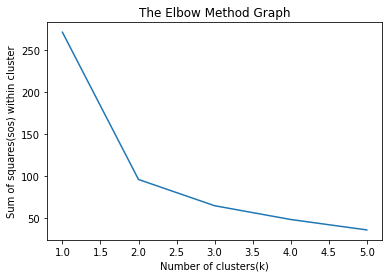

In [ ]:
#Finding optimal number of clusters using the elbow method  
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.figure_factory as ff
from sklearn.cluster import KMeans  
  

def multi_class_norm_plot_df(means, data_sizes, cov, title):
    colours = ['b','c','r','g','m']
    classes = len(means)
    x_points, y_points, output_class = [],[],[]
    X_full,y_full = [],[]
    class_value = 0 
    for i in range(classes):
        x, y = np.random.multivariate_normal(means[i], cov, data_sizes[i]).T
        for j in range(data_sizes[i]):
            X_full.append([x[j],y[j]])
            y_full.append(class_value)
        class_value +=1
        
        
    return np.array(X_full),np.array(y_full)

#Negative covariance
neg_cov = [[1, -0.7], [-0.7, 1]]
#Positive covariance
pos_cov = [[1, 0.7], [0.7, 1]]



#Input means for partially overlap classes
means = [[0,0],[1.5,1.5]]
#Input data size's for partially overlap classes
data_sizes = [50,50]
#plt.plot()
X,y = multi_class_norm_plot_df(means, data_sizes, pos_cov, "Positive Covariance & Partial Overlap")
  
sos= []  #Initializing the list for the values of WCSS
#Using for loop for iterations from 1 to 10.  
for i in range(1, 6):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(X)  
    sos.append(kmeans.inertia_)  
plt.plot(range(1, 6), sos)  
#Using elbow method, we find no, of clusters
plt.title('The Elbow Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('Sum of squares(sos) within cluster')  
plt.show()  



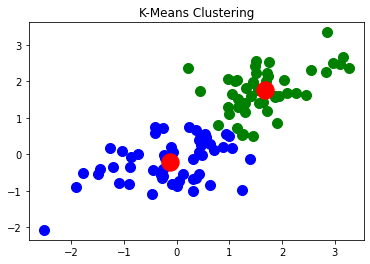

In [ ]:
#training the K-means model on a dataset 
no_of_clusters = 2
kmeans = KMeans(n_clusters= no_of_clusters, init='k-means++', random_state= 42)  

#Fitting K means classifier to train set
y_predict= kmeans.fit_predict(X) 

y_predict = np.array([(i+(no_of_clusters-1))% no_of_clusters for i in y_predict])
#print(kmeans.labels_)

#Plotting the scatter plots
plt.scatter(X[y_predict == 0, 0], X[y_predict == 0, 1], s = 100, c = 'blue', label = 'Cluster 1') #for first cluster  
plt.scatter(X[y_predict == 1, 0], X[y_predict == 1, 1], s = 100, c = 'green', label = 'Cluster 2') #for second cluster  
#plt.scatter(X[y_predict== 2, 0], X[y_predict == 2, 1], s = 100, c = 'cyan', label = 'Cluster 3') #for third cluster  
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'red', label = 'Centroid')   
plt.title('K-Means Clustering')  
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
print(confusion_matrix(y, y_predict))
print('Accuracy Percentage: '+str(round((accuracy_score(y,y_predict)),4) * 100)+"%" )

[[41  9]
 [12 38]]
Accuracy Percentage: 79.0%
